We set up the semidiscretization and initial condition in $x$ just as before.

In [1]:
include("../FNC.jl")
using LinearAlgebra

m = 100
x,Dx,Dxx = FNC.diffper(m,[0,1])
u0 = @. exp( -60*(x-0.5)^2 );

Now, though, we apply a `DifferentialEquations` solver to the initial-value problem $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$.

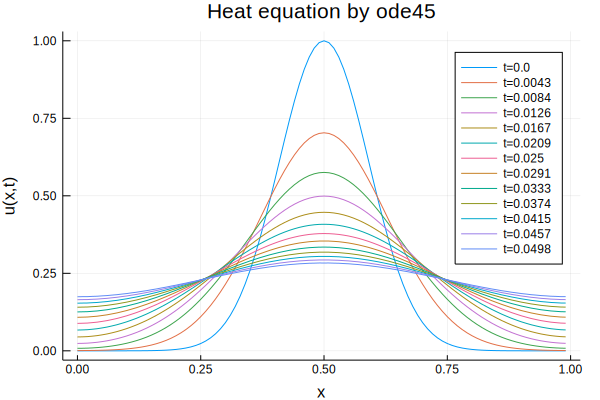

In [2]:
tfinal = 0.05
using DifferentialEquations
ODE = (u,p,t) -> Dxx*u;  
IVP = ODEProblem(ODE,u0,(0,tfinal))

u = solve(IVP,DP5())  # select DP5 solver

using Plots
plot(x,u[:,1:50:end],label=["t=$t" for t in round.(u.t[1:50:end],digits=4)], 
    xaxis=("x"), yaxis=("u(x,t)"),
    title="Heat equation by ode45")

The solution is at least plausible. But the number of time steps that were selected automatically is surprisingly large, considering how smoothly the solution changes.

In [3]:
num_steps_1 = length(u.t)-1

603

Now we apply another solver. 

In [4]:
u = solve(IVP,Rodas4P());

The number of steps selected is reduced by a factor of more than 40!

In [5]:
num_steps_2 = length(u.t)-1

15